In [1]:
from pyspark import SparkContext
import os,sys
import h5py
import read

In [2]:
sc.stop()

In [3]:
#This function took a hdf5 file as input and returns rdd file as output
def test_h5sparkReadsingle():
    sc = SparkContext(appName="h5sparktest")
    rdd=read.h5read(sc,('fonts.hdf5','fonts'),mode='single')
    rdd.cache()
    print "rdd count:",rdd.count()
    sc.stop()

In [4]:
test_h5sparkReadsingle()

rdd count: 56443


In [3]:
sc = SparkContext(appName="h5sparktest")
rdd=read.h5read(sc,('fonts.hdf5','fonts'),mode='single')
rdd.cache()

PythonRDD[7] at RDD at PythonRDD.scala:43

In [4]:
rdd.mean()

----------------------------------------
Exception happened during processing of request from ('127.0.0.1', 49969)


Traceback (most recent call last):
  File "/usr/local/Cellar/python/2.7.11/Frameworks/Python.framework/Versions/2.7/lib/python2.7/SocketServer.py", line 295, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/usr/local/Cellar/python/2.7.11/Frameworks/Python.framework/Versions/2.7/lib/python2.7/SocketServer.py", line 321, in process_request
    self.finish_request(request, client_address)
  File "/usr/local/Cellar/python/2.7.11/Frameworks/Python.framework/Versions/2.7/lib/python2.7/SocketServer.py", line 334, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/usr/local/Cellar/python/2.7.11/Frameworks/Python.framework/Versions/2.7/lib/python2.7/SocketServer.py", line 655, in __init__
    self.handle()
  File "/Users/ruixiongshi/spark-1.6.1/python/pyspark/accumulators.py", line 235, in handle
    num_updates = read_int(self.rfile)
  File "/Users/ruixiongshi/spark-1.6.1/python/pyspark/serializers.py", line 545, in read_

----------------------------------------


    raise EOFError
EOFError


Py4JNetworkError: An error occurred while trying to connect to the Java server

## It seems that I have some connection issue with my local spark sever and I can not solve that after looking at many solutions online so I will use traidtional approach: numpy to do some basic visualisation such as mean, median and it is going to take a lot of time for such a big dataset

In [ ]:
from numpy import floor
import time

def quantile(rdd, p, sample=None, seed=None):
    """Compute a quantile of order p ∈ [0, 1]
    :rdd a numeric rdd
    :p quantile(between 0 and 1)
    :sample fraction of and rdd to use. If not provided we use a whole dataset
    :seed random number generator seed to be used with sample
    """
    assert 0 <= p <= 1
    assert sample is None or 0 < sample <= 1

    seed = seed if seed is not None else time.time()
    rdd = rdd if sample is None else rdd.sample(False, sample, seed)

    rddSortedWithIndex = (rdd.
        sortBy(lambda x: x).
        zipWithIndex().
        map(lambda (x, i): (i, x)).
        cache())

    n = rddSortedWithIndex.count()
    h = (n - 1) * p

    rddX, rddXPlusOne = (
      rddSortedWithIndex.lookup(x)[0]
      for x in int(floor(h)) + np.array([0L, 1L]))

    return rddX + (h - floor(h)) * (rddXPlusOne - rddX)

In [ ]:
quantile(rdd, 0.5)

In [1]:
import numpy
import model
import random
import matplotlib.pyplot as plt
%matplotlib inline

/Users/ruixiongshi/anaconda/envs/theano/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


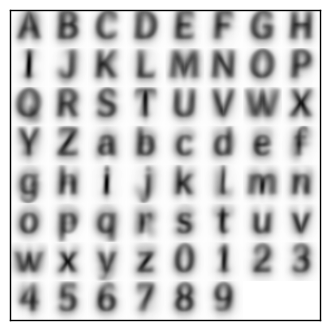

In [16]:
avg = numpy.mean(model.get_data()[:], axis=0)
image = model.draw_grid(avg / 255.)
plt.imshow(image,cmap='gray')
plt.xticks([]),plt.yticks([])
plt.show()

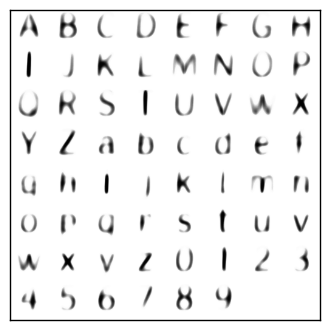

In [15]:
median = numpy.median(model.get_data()[:], axis=0)
image = model.draw_grid(median / 255.)
plt.imshow(image,cmap='gray')
plt.xticks([]),plt.yticks([])
plt.show()

In [14]:
data = model.get_data()
n = data.shape[0]
alphabet = numpy.zeros((39, 64, 64))
for z in xrange(39):
    alphabet[z] = data[z,0] * 1.0/255

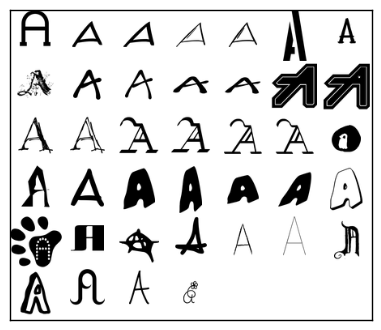

In [15]:
image = model.draw_grid(alphabet)
plt.imshow(image,cmap='gray')
plt.xticks([]),plt.yticks([])
plt.show()

In [6]:
data = model.get_data()
n = data.shape[0]
alphabet = numpy.zeros((62, 64, 64))
for z in xrange(62):
    alphabet[z] = random.choice(data)[z] * 1.0/255

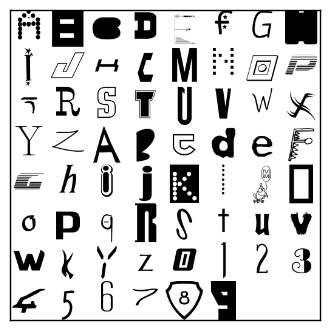

In [11]:
image = model.draw_grid(alphabet)
plt.imshow(image,cmap='gray')
plt.xticks([]),plt.yticks([])
plt.show()

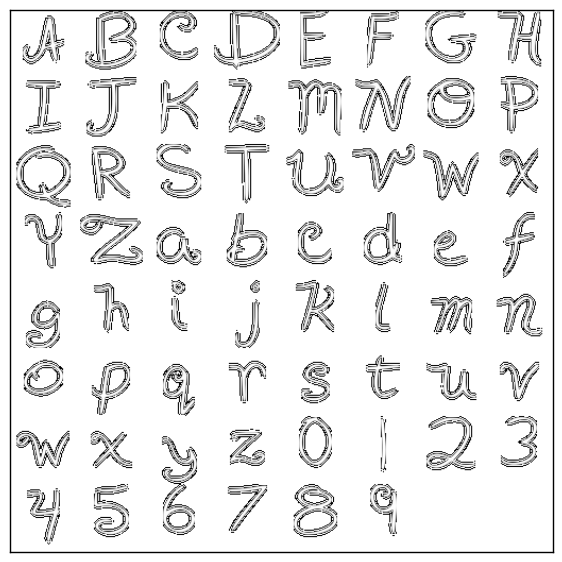

In [29]:
image = model.draw_grid(data[1024,:])
plt.figure(figsize=(7,7))
plt.imshow(image,cmap='gray')
plt.xticks([]),plt.yticks([])
plt.show()

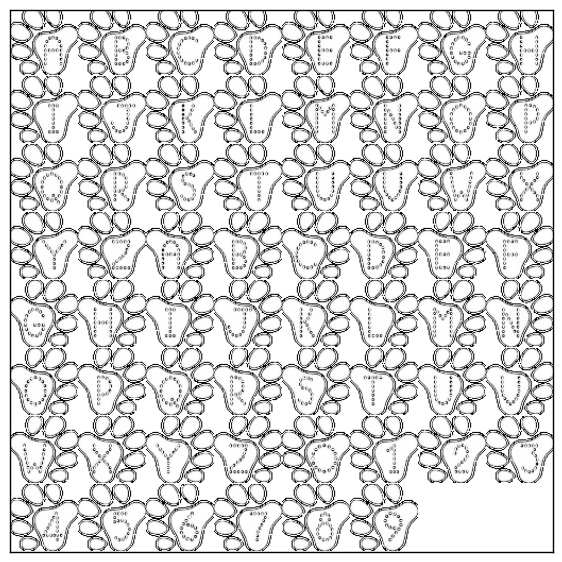

In [30]:
image = model.draw_grid(data[28,:])
plt.figure(figsize=(7,7))
plt.imshow(image,cmap='gray')
plt.xticks([]),plt.yticks([])
plt.show()

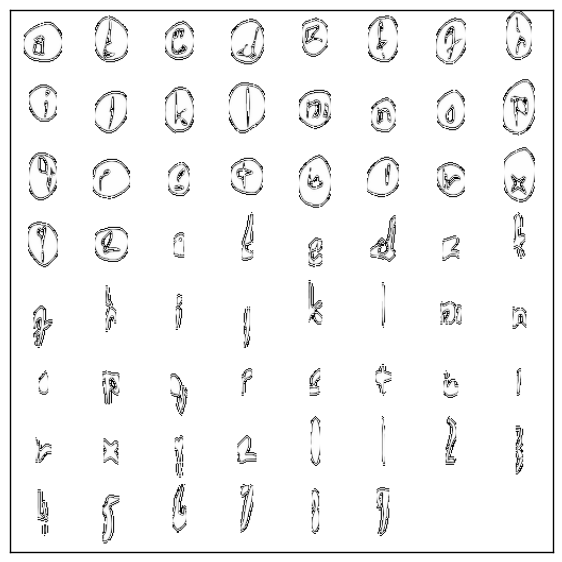

In [53]:
image = model.draw_grid(data[20,:])
plt.figure(figsize=(7,7))
plt.imshow(image,cmap='gray')
plt.xticks([]),plt.yticks([])
plt.show()